In [1]:
# Dataset 1 : Wines

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
# preprocessing
from sklearn.preprocessing import MinMaxScaler
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

#dataset
a = io.open('wine-quality-white-and-red.csv', encoding='latin-1')
df = pd.read_csv(a)
#df = df.take([10*i for i in range(649)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['type'])

#output
y = df['type']

df.shape

(6497, 13)

In [12]:
# Create the object 
scaler = MinMaxScaler()
# Calculate the mean and the standard deviation
scaler.fit(X)
# Transform the values
X_scaled = scaler.transform(X)

Feature: 0, Score: 0.00759
Feature: 1, Score: 0.04893
Feature: 2, Score: 0.00428
Feature: 3, Score: 0.00169
Feature: 4, Score: 0.21077
Feature: 5, Score: 0.00123
Feature: 6, Score: 0.67701
Feature: 7, Score: 0.01566
Feature: 8, Score: 0.00259
Feature: 9, Score: 0.01710
Feature: 10, Score: 0.01107
Feature: 11, Score: 0.00207
time for running the algorithm = 0.16170209299889393 s


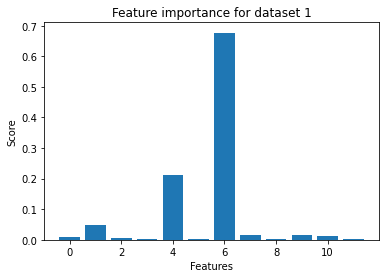

In [16]:
from matplotlib import pyplot

time1 = time.perf_counter()

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_scaled, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
    
time2 = time.perf_counter()
timeA = time2 - time1
print('time for running the algorithm =',timeA,'s')

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel('Features')
pyplot.ylabel('Score')
pyplot.title('Feature importance for dataset 1')
pyplot.show()

In [19]:
df_new = pd.DataFrame(df, columns =['fixed acidity','citric acid','chlorides','type'] )
df_new.head()

,fixed acidity,citric acid,chlorides,type
0,31,36,34,1
1,23,34,38,1
2,43,40,39,1
3,34,32,47,1
4,34,32,47,1


In [20]:
# save the data
df_new.to_csv('wine_quality_DT.csv', index=False)